In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
%aimport -os
import sys
%aimport -sys
import numpy as np
%aimport -numpy
from itertools import chain, product
import matplotlib.pyplot as plt
%aimport -matplotlib.pyplot

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
from webmet.merge import WebKernel, WebLine, load_kernel, multi_find_centroid, plot_kernel

In [4]:
weblinescopetest = WebLine([[1, 1], [6, 3]])

def mutatetest(line):
    line.line_type=3
    print(line)
    return line

print(weblinescopetest)
weblinescopetest_after = mutatetest(weblinescopetest)
print(weblinescopetest)
print(weblinescopetest_after)

[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Uncategorised
ID: -1
[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Sticky
ID: -1
[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Sticky
ID: -1
[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Sticky
ID: -1


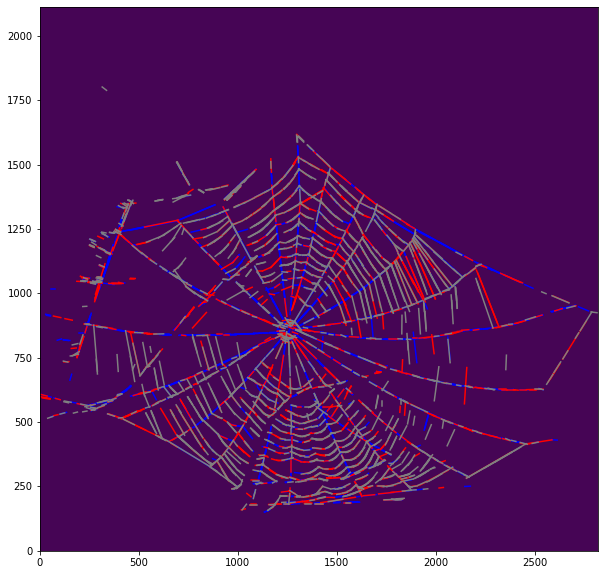

In [5]:
testkernel = load_kernel("../data/full_web_kernel.json", flipped=True)
testkernel = testkernel.paint({x:1 for x in range(1000)})
testkernel = testkernel.paint({x:3 for x in range(1000, 2000)}, reset_missing=False)
# testkernel = testkernel.demo_random_paint()
plot_kernel(testkernel)

In [6]:
def is_vert(theta, threshold=np.pi/20):
    if np.pi/2 + threshold >= theta >= np.pi/2 - threshold:
        return True
    if -np.pi/2 + threshold >= theta >= -np.pi/2 - threshold:
        return True
    return False

def is_horiz(theta, threshold=np.pi/20):
    if 0 + threshold >= theta >= 0 - threshold:
        return True
    if -np.pi + threshold >= theta >= -np.pi:
        return True
    if np.pi >= theta >= np.pi - threshold:
        return True
    return False

In [12]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def classify_threads(kernel, hub, threshold=np.pi/20, vertthresh=True):
    """Perform polar coordinate unwrap, rescale, and assesment.
    By default, return proportion of lines left uncategorised."""
    
    polar = kernel.to_polar(origin = hub, flipped = True).rescale(dimensions=kernel.dimensions).recalculate_transformed_orientations()
    
    out = {l.id: 3 for l in polar if is_horiz(l.transformed_orientation, threshold)}
    out.update({l.id: 1 for l in polar if is_vert(l.transformed_orientation, threshold)})
    
    return out
#     [1 for o in line_orientations if is_horiz(o, threshold)]
    
    
classify_map = classify_threads(testkernel, (1257, 847), np.pi/5) # Hub may well be (1257, 847) after flipping, 1257, 1105 before.
classify_map


-3.1406198912507097
3.141592653589793
2816


{1: 3,
 3: 3,
 7: 3,
 13: 3,
 20: 3,
 23: 3,
 27: 3,
 28: 3,
 32: 3,
 33: 3,
 41: 3,
 42: 3,
 45: 3,
 49: 3,
 58: 3,
 59: 3,
 62: 3,
 67: 3,
 70: 3,
 75: 3,
 78: 3,
 80: 3,
 81: 3,
 87: 3,
 90: 3,
 91: 3,
 92: 3,
 93: 3,
 107: 3,
 109: 3,
 110: 3,
 111: 3,
 113: 3,
 120: 3,
 123: 3,
 128: 3,
 136: 3,
 139: 3,
 143: 3,
 145: 3,
 150: 3,
 151: 3,
 154: 3,
 155: 3,
 166: 3,
 168: 3,
 169: 3,
 170: 3,
 171: 3,
 175: 3,
 182: 3,
 188: 3,
 191: 3,
 192: 3,
 194: 3,
 196: 3,
 201: 3,
 202: 3,
 208: 3,
 215: 3,
 216: 3,
 217: 3,
 218: 3,
 220: 3,
 221: 3,
 228: 3,
 230: 3,
 233: 3,
 234: 3,
 245: 3,
 247: 3,
 250: 3,
 252: 3,
 255: 3,
 256: 3,
 259: 3,
 262: 3,
 264: 3,
 265: 3,
 268: 3,
 274: 3,
 275: 3,
 277: 3,
 280: 3,
 281: 3,
 286: 3,
 289: 3,
 297: 3,
 302: 3,
 303: 3,
 309: 3,
 311: 3,
 312: 3,
 314: 3,
 315: 3,
 317: 3,
 321: 3,
 326: 3,
 327: 3,
 329: 3,
 330: 3,
 332: 3,
 333: 3,
 342: 3,
 346: 3,
 348: 3,
 352: 3,
 354: 3,
 357: 3,
 359: 3,
 368: 3,
 370: 3,
 372: 3,
 373: 3,
 376:

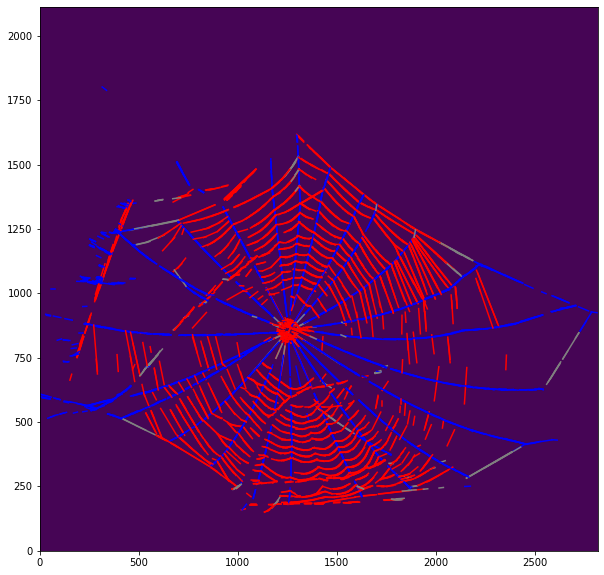

In [8]:
testkernel.paint(classify_map, reset_missing=True)
plot_kernel(testkernel)

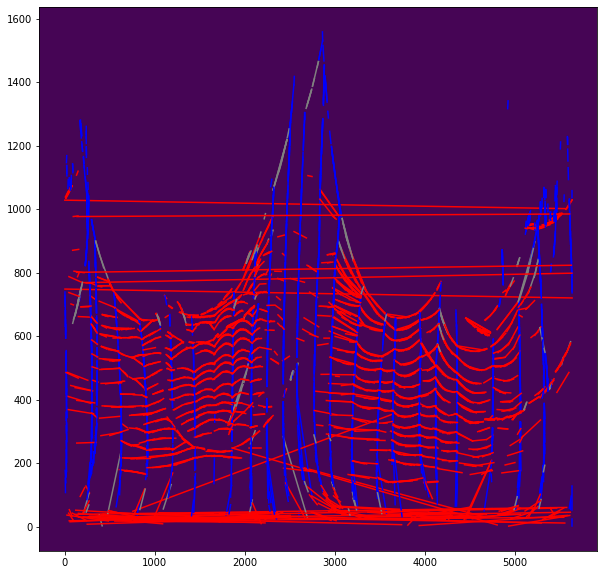

In [9]:
plot_kernel(testkernel, transformed=True)

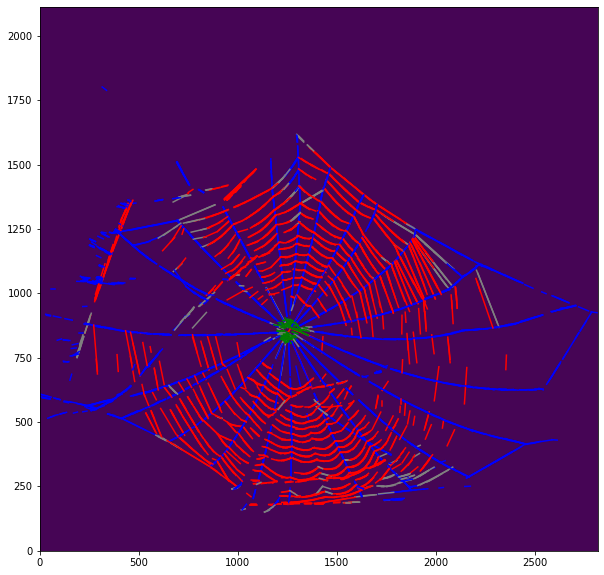

In [26]:
def classify_threads_flexible(kernel, hub, threshold=np.pi/20, hub_threshold_prop=0.07):
    """Perform polar coordinate unwrap, rescale, and assesment.
    By default, return proportion of lines left uncategorised."""
    
    polar = kernel.to_polar(origin = hub, flipped = True).rescale(dimensions=kernel.dimensions).recalculate_transformed_orientations()
    
    t, r = zip(*list(chain.from_iterable(polar.as_list_transformed())))
    rmax = max(r)
    rmin = min(r)
    
    
    out = dict()
    for l in polar:
        if is_vert(l.transformed_orientation, threshold):
            out[l.id] = 1
        elif is_horiz(l.transformed_orientation, threshold):
            l_t, l_r = np.array(l.transformed_line)[:, 0], np.array(l.transformed_line)[:, 1]
            if all(l_r <= rmax*hub_threshold_prop):
                out[l.id] = 2
            else:
                out[l.id] = 3    
    return out
    
    
classify_map_flexible = classify_threads_flexible(testkernel, (1257, 847), np.pi/5) # Hub may well be (1257, 847) after flipping, 1257, 1105 before.
testkernel.paint(classify_map_flexible, reset_missing=True)
plot_kernel(testkernel)

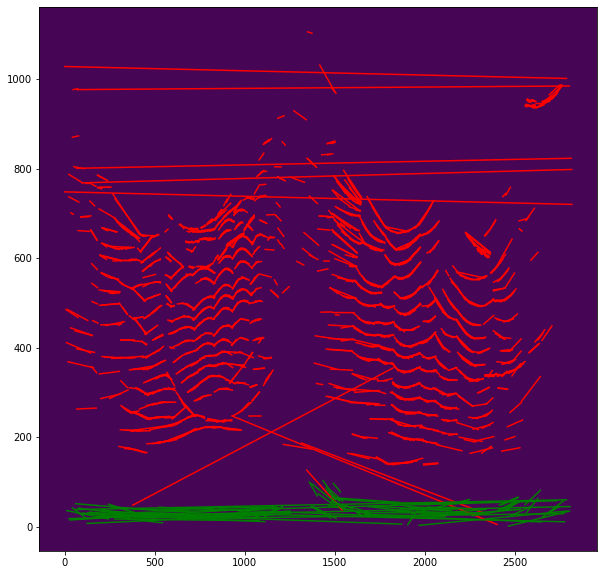

In [27]:
plot_kernel(testkernel, filter_lines=["hub", "sticky"], transformed=True)

(0, 1103.8638808538553)

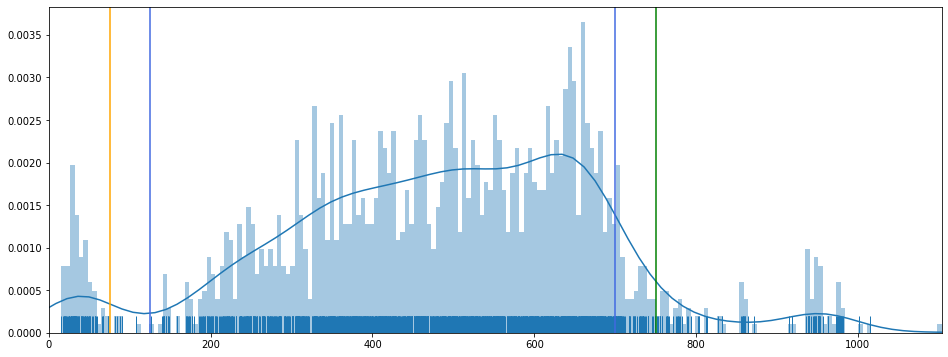

In [50]:
import seaborn as sns
%aimport -seaborn

r_vals = []
for x in testkernel:
    if x.line_type > 1:
        working = list()
        tl = np.array(x.transformed_line)
        t, r = tl[:, 0], tl[:, 1]
        r_vals.extend(np.repeat(np.mean(r), 1).tolist())
plt.figure(figsize=(16, 6))
sns.distplot(r_vals, hist=True,bins=200, kde=True, rug=True)
plt.axvline(75, color="orange")
plt.axvline(125, color="royalblue")
plt.axvline(700, color="royalblue")
plt.axvline(750, color="green")
plt.xlim(0, max(r_vals))

To make a density plot weighted by length of line, it would be best to repeat each value by its length. This magnifies every entry by its line length.

This will make the data VERY large though, so a better custom implementation will be needed, but this is a nice quick and dirty hack.

(0, 1103.8638808538553)

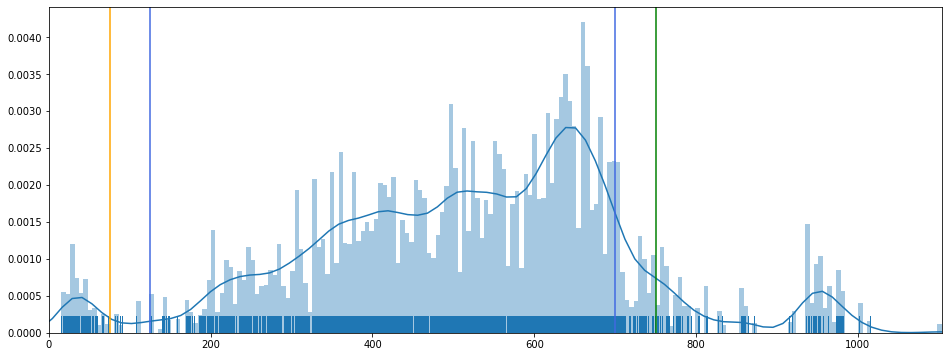

In [49]:
r_vals = []
for x in testkernel:
    if x.line_type > 1:
        working = list()
        tl = np.array(x.transformed_line)
        t, r = tl[:, 0], tl[:, 1]
        # Repeat each value by its normal space length
        r_vals.extend(np.repeat(np.mean(r), np.ceil(x.length)).tolist())
plt.figure(figsize=(16, 6))
sns.distplot(r_vals, hist=True,bins=200, kde=True, rug=True)
plt.axvline(75, color="orange")
plt.axvline(125, color="royalblue")
plt.axvline(700, color="royalblue")
plt.axvline(750, color="green")
plt.xlim(0, max(r_vals))
